# **DS 6001: Lab Assignment 10**
## **Randa Ampah**

## **Problem 1**

### **Part A**

`conda create --name eda python=3.12.12 pip`

`conda activate eda`

`conda install pandas numpy scipy scikit-learn requests prince ipykernel condaforge::wquantiles`

`pip install ydata_profiling`

### **Part B**

In [2]:
import numpy as np
import pandas as pd
import weighted # this is a module of wquantiles
from scipy import stats
import prince
from ydata_profiling import ProfileReport

## **Problem 2**

In [3]:
%%capture
gss = pd.read_csv("https://github.com/jkropko/DS-6001/raw/master/localdata/gss2018.csv",
                 encoding='cp1252', na_values=['IAP','IAP,DK,NA,uncodeable', 'NOT SURE',
                                               'DK', 'IAP, DK, NA, uncodeable', '.a', "CAN'T CHOOSE"])

### **Part A**

In [4]:
cols = ['id','wtss','sex','educ','region','age','coninc',
        'prestg10','mapres10','papres10','sei10','satjob',
        'fechld','fefam','fepol','fepresch','meovrwrk']

gss = gss[cols]
gss.head()

id      wtss     sex  educ       region age       coninc  prestg10  \
0   1  2.357493    male  14.0  new england  43          NaN      47.0   
1   2  0.942997  female  10.0  new england  74   22782.5000      22.0   
2   3  0.942997    male  16.0  new england  42  112160.0000      61.0   
3   4  0.942997  female  16.0  new england  63  158201.8412      59.0   
4   5  0.942997    male  18.0  new england  71  158201.8412      53.0   

   mapres10  papres10  sei10          satjob          fechld     fefam  \
0      31.0      45.0   65.3  very satisfied  strongly agree  disagree   
1      32.0      39.0   14.8             NaN             NaN       NaN   
2      32.0      72.0   83.4  mod. satisfied  strongly agree  disagree   
3       NaN      39.0   69.3  very satisfied           agree  disagree   
4      35.0      45.0   68.6             NaN             NaN       NaN   

      fepol           fepresch                    meovrwrk  
0     agree  strongly disagree                       agree  
1       NaN                NaN                         NaN  
2  disagree           disagree                    disagree  
3  disagree           disagree  neither agree nor disagree  
4       NaN                NaN                         NaN

### **Part B**

In [11]:
rename_map = {'wtss':'sample_weights',
              'coninc':'income',
              'prestg10':'prestige',
              'mapres10':'mom_prestige',
              'papres10':'dad_prestige',
              'sei10':'socioecon_status',
              'fechld':'working_mom',
              'fefam':'mom_homemaker',
              'fepol':'male_politics',
              'fepresch':'preschool_mother',
              'meovrwrk':'dad_overwork'}



gss = gss.rename(rename_map,axis=1)
gss.head()

id  sample_weights     sex  educ       region age       income  prestige  \
0   1        2.357493    male  14.0  new england  43          NaN      47.0   
1   2        0.942997  female  10.0  new england  74   22782.5000      22.0   
2   3        0.942997    male  16.0  new england  42  112160.0000      61.0   
3   4        0.942997  female  16.0  new england  63  158201.8412      59.0   
4   5        0.942997    male  18.0  new england  71  158201.8412      53.0   

   mom_prestige  dad_prestige  socioecon_status          satjob  \
0          31.0          45.0              65.3  very satisfied   
1          32.0          39.0              14.8             NaN   
2          32.0          72.0              83.4  mod. satisfied   
3           NaN          39.0              69.3  very satisfied   
4          35.0          45.0              68.6             NaN   

      working_mom mom_homemaker male_politics   preschool_mother  \
0  strongly agree      disagree         agree  strongly disagree   
1             NaN           NaN           NaN                NaN   
2  strongly agree      disagree      disagree           disagree   
3           agree      disagree      disagree           disagree   
4             NaN           NaN           NaN                NaN   

                 dad_overwork  
0                       agree  
1                         NaN  
2                    disagree  
3  neither agree nor disagree  
4                         NaN

### **Part C**

In [14]:
gss['age'] = gss['age'].replace({'89 or older':89}).astype('float')
gss['age'].unique()

array([43., 74., 42., 63., 71., 67., 59., 62., 55., 34., 61., 44., 41.,
       75., 30., 40., 29., 37., 56., 82., 68., 20., 89., 60., 65., 45.,
       50., 52., 46., 53., 22., 33., 23., 28., 27., 64., 79., 32., 35.,
       21., 47., 70., 77., 69., 48., 81., 78., 54., 58., 76., 39., 38.,
       25., 49., 18., 19., 26., 57., 51., 36., 72., 24., 88., 66., 84.,
       80., 31., 83., 73., 86., nan, 85., 87.])

## **Problem 3**

### **Part A**

In [16]:
profile = ProfileReport(gss,
                        title = 'GSS 2018 Data EDA',
                        html = {'style':{'full_width' : True}},
                        minimal = False)


profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 17/17 [00:00<00:00, 204.94it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### **Part B**

1. There are 124 people from New England.

2. The fepol (renamed as male_politics) variable has the most missing values at 849, and 36.2% of the values are missing for this variable.

3. Socioconomic status and respondent's occupational prestige score have the highest correlation.

4.  One thing that I noticed it that there aren't many people who responded to this survey who err on the side of not being satisified with their jobs (around 250 as opposed to over 1,000 who responded positively about their satisfaction).

5. The variables that concern an opinion (job satisfaction, opinions on working moms, etc.) have a lot more missing values than the rest of the variables ranging from 600 to over 800 as opposed to about 0 to around 200 for the more quantitative variables.

6. Something interesting I noticed about the data was that the opinion variables often leaned fairly strongly towards one side, and for the most part those leanings were ones that strayed away from the traditional family gender role stereotypes, which may indicate that Americans (at least the types to complete this survey) may be leaning more progressive in certain ideals. 

## **Problem 4**

### **Part A**

In [20]:
gss.groupby('sex').agg({'sample_weights':'mean'})

sample_weights
sex                   
female        0.986689
male          1.016399

This suggests that are slightly less males sampled using this survey's sample strategy because they are weighted slightly higher.

### **Part B**

In [31]:
gss['educ_cat'] = pd.cut(gss.educ, 
                         bins=[-1,11,12,15,16,50],
                         labels = ('Less than HS diploma','HS diploma',
                                   'Some college','College degree','Graduate education'))

In [41]:
gss.groupby(['educ_cat']).agg({'sample_weights':'mean'})

/var/folders/1z/t_vl0dx95552hzn7xv8z08sm0000gn/T/ipykernel_90677/1888166385.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gss.groupby(['educ_cat']).agg({'sample_weights':'mean'})


sample_weights
educ_cat                            
Less than HS diploma        1.005145
HS diploma                  0.976092
Some college                1.005552
College degree              1.017187
Graduate education          1.009020

A bias in this survey's sampling strategy is slightly oversampling people with a high school diploma as their highest education more than any other group, and slightly undersampling college degree holders less than any other group.

### **Part C**

In [55]:
incs = gss[['income','sample_weights']].dropna()

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline

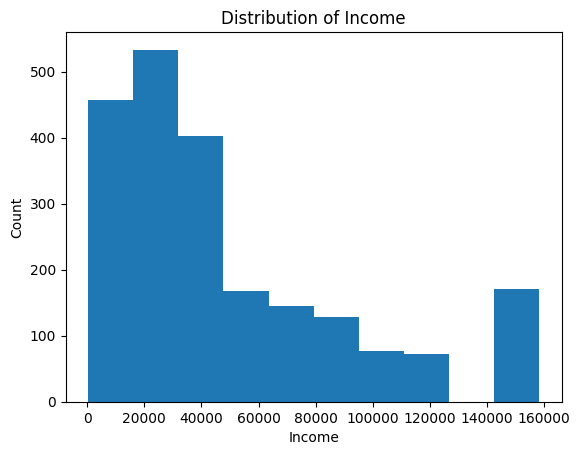

In [64]:
plt.hist(incs.income)
plt.xlabel("Income")
plt.ylabel("Count")
plt.title("Distribution of Income")
plt.show()

In [65]:
incs.income.median()

38555.0

When looking solely at the median value of 38,555 dollars, which is the 50th percentile of the distribution of the data, it could be argued that the "average" American makes less than 39,000 dollars a year, because according to the median, 50% of Americans have a salary that is at or below 38,555 dollars.

In [56]:
float(np.average(incs.income, weights=incs.sample_weights))

55158.96280421564

When compiling an average that takes into consideration the weights of the people sampled within the dataset, we end up with an income of about $55,158.96. This would justify the claims that the person talking about the typical American made.

Originally, I was more inclined to agree with the person claiming the typical American makes more than $55,000 a year, just because it takes the biases of the sample wihtin the dataset more into account. But I then realized that there are less people who have a very high salary, which would make them weighted more heavily but wouldn't be as reflective of the data. So, I would say I agree more with the person utilizing the median because it is a more accurate metric when dealing with skewed data, and the income variable is right skewed in this case.

## **Problem 5**

### **Part A**

In [85]:
gss.groupby('sex').agg({'income':'mean'})

income
sex                 
female  47191.021452
male    53314.626187

According to the results of the table, there seems to be about a $6,000 difference in average annual income between men and women, favoring men.

In [86]:
gss_men = gss.query("sex=='male'").income.dropna()
gss_women = gss.query("sex=='female'").income.dropna()

In [87]:
stats.ttest_ind(gss_men, gss_women, equal_var=False)

TtestResult(statistic=np.float64(3.332824087618215), pvalue=np.float64(0.000874955788153009), df=np.float64(2053.1579577339658))

According to our statstically significant p-value of 0.00087, we can reject the null hypothesis and conclude that there is evidence that there is a difference in average income between men and women within this dataset.

### **Part B**

In [94]:
gss.groupby('satjob').agg({'prestige':'mean'})

prestige
satjob                      
a little dissat    40.946429
mod. satisfied     42.589984
very dissatisfied  43.000000
very satisfied     46.189320

Intuitively, one would assume that the higher the prestige of a job, the more satisfied people will be with it, however, the data in the table does not follow that pattern. The 2 categories with the highest average prestige scores are very dissatisfied and very satisfied, which are the 2 extreme categories. This warrants further exploration.

In [96]:
stats.f_oneway(gss.query("satjob=='very satisfied'").prestige.dropna(),
               gss.query("satjob=='mod. satisfied'").prestige.dropna(),
               gss.query("satjob=='a little dissat'").prestige.dropna(),
               gss.query("satjob=='very dissatisfied'").prestige.dropna())

F_onewayResult(statistic=np.float64(12.205403153509739), pvalue=np.float64(6.67668642502983e-08))

The p-value of 6.68e-08 suggests that there is evidence that average prestige score of at least one of the categories of job satisfaction is statistically significantly different from the other categories. Basically this means that there are different average values of prestige at different levels of job satisfaction.

### **Part C**

In [100]:
corrs = gss[['educ','socioecon_status','income','prestige','mom_prestige','dad_prestige']].dropna()
corrs.corr()

educ  socioecon_status    income  prestige  \
educ              1.000000          0.545461  0.355150  0.467594   
socioecon_status  0.545461          1.000000  0.389815  0.825196   
income            0.355150          0.389815  1.000000  0.317390   
prestige          0.467594          0.825196  0.317390  1.000000   
mom_prestige      0.245041          0.191581  0.142329  0.194009   
dad_prestige      0.247348          0.203157  0.167963  0.181031   

                  mom_prestige  dad_prestige  
educ                  0.245041      0.247348  
socioecon_status      0.191581      0.203157  
income                0.142329      0.167963  
prestige              0.194009      0.181031  
mom_prestige          1.000000      0.222054  
dad_prestige          0.222054      1.000000

In [101]:
gss_corr = gss[['educ', 'socioecon_status']].dropna()
stats.pearsonr(gss_corr.educ, gss_corr.socioecon_status)

PearsonRResult(statistic=np.float64(0.5581686004626785), pvalue=np.float64(3.7194488100284597e-184))

This p-value, which is below 0.05, suggests that there is evidence of some sort of relationship relationship between years of education and socioeconomic status. This means that the probability that a random sample could produce a correlation between education and socioeconomic status as or more extreme than 0.55 is below our threshold, making it unlikely.

### **Part D**

In [103]:
gss['age_cat'] = pd.cut(gss.age, 
                         bins=[17,35,49,69,100],
                         labels = ('18-35','36-49',
                                   '50-69','70 and older'))

In [108]:
gss['mom_homemaker'] = gss['mom_homemaker'].astype('category')
gss['mom_homemaker'] = gss['mom_homemaker'].cat.reorder_categories(['strongly agree',
                                                                    'agree', 'disagree', 
                                                                    'strongly disagree'])

In [115]:
cross = (pd.crosstab(gss.age_cat, gss.mom_homemaker, normalize='index')*100).round(2)
cross

mom_homemaker  strongly agree  agree  disagree  strongly disagree
age_cat                                                          
18-35                    3.94  14.04     47.54              34.48
36-49                    4.79  17.46     46.48              31.27
50-69                    4.63  20.85     48.07              26.45
70 and older            11.97  31.66     39.00              17.37

In [120]:
stats.chi2_contingency(cross.values)

Chi2ContingencyResult(statistic=np.float64(22.340815141048374), pvalue=np.float64(0.00785936363331225), dof=9, expected_freq=array([[ 6.3325, 21.0025, 45.2725, 27.3925],
       [ 6.3325, 21.0025, 45.2725, 27.3925],
       [ 6.3325, 21.0025, 45.2725, 27.3925],
       [ 6.3325, 21.0025, 45.2725, 27.3925]]))

The p-value is below 0.05, which means we can reject the null hypothesis. This suggests that there is sufficient evidence to conclude that there is a relationship between these the categorical age variable and the level of agreement with the sentiment that men should be achievers outside of the home and women should take care for the home and family.

## **Problem 6**

### **Part A**

In [69]:
gss_mca = gss[['working_mom','mom_homemaker','male_politics','preschool_mother','dad_overwork']].dropna()

In [70]:
MCA = prince.MCA(n_components=2)
MCA = MCA.fit(gss_mca)

### **Part B**

In [73]:
MCA.column_coordinates(gss_mca).sort_values(0)

0         1
preschool_mother__strongly disagree      -1.258059  0.886695
dad_overwork__strongly disagree          -1.135403  1.283832
mom_homemaker__strongly disagree         -0.922035  0.566804
working_mom__strongly agree              -0.901119  0.472185
dad_overwork__neither agree nor disagree -0.480746 -0.163826
dad_overwork__disagree                   -0.228690 -0.242583
male_politics__disagree                  -0.180400 -0.063735
preschool_mother__disagree               -0.067886 -0.529256
mom_homemaker__disagree                   0.022160 -0.572469
working_mom__agree                        0.080484 -0.586396
dad_overwork__agree                       0.358280 -0.187027
dad_overwork__strongly agree              0.536780  1.292008
mom_homemaker__agree                      0.878984 -0.076580
working_mom__disagree                     0.918041 -0.010328
preschool_mother__agree                   0.919992 -0.036430
male_politics__agree                      1.131107  0.399620
working_mom__strongly disagree            1.218706  2.005406
preschool_mother__strongly agree          1.474181  2.233946
mom_homemaker__strongly agree             1.564723  2.002706

The first latent feature is attempting to measure gender role ideology. At the top, we have the categories reflecting responses that tend to go against traditional gender roles within the family and society, which is men being breadwinners and women being homemakers, while the bottom errs towards agreeing with these traditional roles.

In [125]:
row_coord = MCA.row_coordinates(gss_mca).rename({0:'gender_role_ideology'},axis=1)
row_coord

gender_role_ideology         1
0                -0.202209  0.338288
2                -0.423361 -0.316905
3                -0.195576 -0.648698
5                -0.240092 -0.298092
8                 0.341539  0.091186
...                    ...       ...
2341              1.219019  0.567439
2343             -0.521777  0.384967
2344             -0.423361 -0.316905
2346              1.076900  0.642127
2347              1.440615  2.529641

[1454 rows x 2 columns]

### **Part C**

In [127]:
gender_role = row_coord[['gender_role_ideology']]
gender_role

gender_role_ideology
0                -0.202209
2                -0.423361
3                -0.195576
5                -0.240092
8                 0.341539
...                    ...
2341              1.219019
2343             -0.521777
2344             -0.423361
2346              1.076900
2347              1.440615

[1454 rows x 1 columns]

In [128]:
gss.head()

id  sample_weights     sex  educ       region   age       income  prestige  \
0   1        2.357493    male  14.0  new england  43.0          NaN      47.0   
1   2        0.942997  female  10.0  new england  74.0   22782.5000      22.0   
2   3        0.942997    male  16.0  new england  42.0  112160.0000      61.0   
3   4        0.942997  female  16.0  new england  63.0  158201.8412      59.0   
4   5        0.942997    male  18.0  new england  71.0  158201.8412      53.0   

   mom_prestige  dad_prestige  socioecon_status          satjob  \
0          31.0          45.0              65.3  very satisfied   
1          32.0          39.0              14.8             NaN   
2          32.0          72.0              83.4  mod. satisfied   
3           NaN          39.0              69.3  very satisfied   
4          35.0          45.0              68.6             NaN   

      working_mom mom_homemaker male_politics   preschool_mother  \
0  strongly agree      disagree         agree  strongly disagree   
1             NaN           NaN           NaN                NaN   
2  strongly agree      disagree      disagree           disagree   
3           agree      disagree      disagree           disagree   
4             NaN           NaN           NaN                NaN   

                 dad_overwork              educ_cat       age_cat  
0                       agree          Some college         36-49  
1                         NaN  Less than HS diploma  70 and older  
2                    disagree        College degree         36-49  
3  neither agree nor disagree        College degree         50-69  
4                         NaN    Graduate education  70 and older

In [129]:
gss_clean = gss.join(gender_role, how="outer")
gss_clean

id  sample_weights     sex  educ       region   age       income  \
0        1        2.357493    male  14.0  new england  43.0          NaN   
1        2        0.942997  female  10.0  new england  74.0   22782.5000   
2        3        0.942997    male  16.0  new england  42.0  112160.0000   
3        4        0.942997  female  16.0  new england  63.0  158201.8412   
4        5        0.942997    male  18.0  new england  71.0  158201.8412   
...    ...             ...     ...   ...          ...   ...          ...   
2343  2344        0.471499  female  12.0  new england  37.0          NaN   
2344  2345        0.942997  female  12.0  new england  75.0   22782.5000   
2345  2346        0.942997  female  12.0  new england  67.0   70100.0000   
2346  2347        0.942997    male  16.0  new england  72.0   38555.0000   
2347  2348        0.471499  female  12.0  new england  79.0          NaN   

      prestige  mom_prestige  dad_prestige  socioecon_status          satjob  \
0         47.0          31.0          45.0              65.3  very satisfied   
1         22.0          32.0          39.0              14.8             NaN   
2         61.0          32.0          72.0              83.4  mod. satisfied   
3         59.0           NaN          39.0              69.3  very satisfied   
4         53.0          35.0          45.0              68.6             NaN   
...        ...           ...           ...               ...             ...   
2343      47.0          31.0          72.0              38.8  mod. satisfied   
2344      28.0           NaN          27.0              21.6  very satisfied   
2345      40.0          45.0          53.0              41.8             NaN   
2346      47.0          53.0          50.0              62.7             NaN   
2347      33.0           NaN          46.0              13.6  very satisfied   

            working_mom      mom_homemaker male_politics   preschool_mother  \
0        strongly agree           disagree         agree  strongly disagree   
1                   NaN                NaN           NaN                NaN   
2        strongly agree           disagree      disagree           disagree   
3                 agree           disagree      disagree           disagree   
4                   NaN                NaN           NaN                NaN   
...                 ...                ...           ...                ...   
2343           disagree  strongly disagree      disagree  strongly disagree   
2344     strongly agree           disagree      disagree           disagree   
2345                NaN                NaN           NaN                NaN   
2346           disagree              agree      disagree     strongly agree   
2347  strongly disagree     strongly agree      disagree     strongly agree   

                    dad_overwork              educ_cat       age_cat  \
0                          agree          Some college         36-49   
1                            NaN  Less than HS diploma  70 and older   
2                       disagree        College degree         36-49   
3     neither agree nor disagree        College degree         50-69   
4                            NaN    Graduate education  70 and older   
...                          ...                   ...           ...   
2343                    disagree            HS diploma         36-49   
2344                    disagree            HS diploma  70 and older   
2345                         NaN            HS diploma         50-69   
2346                       agree        College degree  70 and older   
2347              strongly agree            HS diploma  70 and older   

      gender_role_ideology  
0                -0.202209  
1                      NaN  
2                -0.423361  
3                -0.195576  
4                      NaN  
...                    ...  
2343             -0.521777  
2344             -0.423361  
2345                   NaN  
2346              1.076900  
2

In [130]:
pd.crosstab(gss_clean.age_cat, gss_clean.sex, 
            values=gss_clean.gender_role_ideology, aggfunc='mean').round(2)

sex           female  male
age_cat                   
18-35          -0.24 -0.00
36-49          -0.14 -0.00
50-69          -0.13  0.22
70 and older    0.13  0.47

This table suggests that overall, it seems that there is a pattern of increasing traditional views of gender role ideology as age group increases. It also suggests that men have an overall more traditional standpoint on gender role ideology than women do overall. 